# Assignment 2

**学号**: 2168511091

**姓名**: 陈国栋

## 目标分数档次：满分

满足的对应档次得分点：

1、数据集不少于100,000个样本。

2、运用机器学习等高级工具进行了数据分析或预测。

3、用除了matplotlib的其他可视化工具进行数据呈现（plotly等）。

## 数据集策略

手动生成。

## 数据集介绍

以随机函数的方式生成10万人员的性别、年龄、工资和学历，并计算其个人所得税。主要使用了random.choices()和DataFrame.apply()以简洁、直观地生成数据集。

字段详细介绍：


|  字段名   | 描述  |
|  ----  | ----  |
| age  | 年龄，取值为20至60之间的随机整数。 |
| gender  | 性别，取值为male、female之一。 |
| degree  | 学历，取值为None、BA、MBA、MA、PhD之一。 |
| salary  | 工资，取值综合考虑了学历、年龄和性别的因素。 |


## 作业总体任务介绍

1、生成数据集。

2、对数据集进行基础分析（如：分组、筛选）和计算（如：计算最大值、最小值、平均值和个人所得税等），再分析各数据列之关的相关关系（如：线性相关关系）。

3、最后使用几个简单的机器学习模型对关系“（age，degree）=>salary”进行预测，并横向比较了各个模型的r2_score值的大小。

## 作业难点或挑战

1、对数据集依照degree顺序[None|BA|MBA|MA|PhD]进行排序。

2、将数据分成了male组和female组，并制作对比型柱状图。

3、理解和运用机器学习的基本过程。


### 任务1：数据生成

#### 以随机的方式生成“age”和“gender”数组，再将其加入DataFrame。

In [481]:
import random
import pandas as pd

SIZE = 100000
age_list = random.choices(range(20,60), k = SIZE)
gender_list = random.choices(["male", "female"], k = SIZE)

df = pd.DataFrame({'age': age_list, 'gender': gender_list})
df.head()

,age,gender
0,32,male
1,47,female
2,57,male
3,38,female
4,33,male


#### 以DataFrame.apply()的方法，直接在DataFrame对象中插入“degree”和“salary”数据列。其中salary的值考虑了degree、age和gender因素。

In [482]:
DEGREES = ['None', 'BA', 'MBA', 'MA', 'PhD']
def generate_degree(row):
    return random.choice(DEGREES)
df['degree'] = df.apply(generate_degree, axis = 1)

def calculate_salary(row):
    salary = 3000 + DEGREES.index(row.degree) * random.randrange(800, 1200)
    salary = salary + (row.age - 20) * random.randrange(100, 200)
    if row.gender == 'male':
        salary = salary + 2000
    return salary

df['salary'] = df.apply(calculate_salary, axis = 1)
df.head()

,age,gender,degree,salary
0,32,male,MBA,8866
1,47,female,MA,10188
2,57,male,MBA,13341
3,38,female,None,5862
4,33,male,BA,7297


#### 计算个人所得税。至此，数据集在内存中生成完毕。

In [483]:
def calculate_tax(row):
    amountNeedToPayTax = row['salary'] - 3500
    if amountNeedToPayTax > 80000:
        return amountNeedToPayTax * 0.45 - 13505
    if amountNeedToPayTax > 55000:
        return amountNeedToPayTax * 0.35 - 5505
    if amountNeedToPayTax > 35000:
        return amountNeedToPayTax * 0.30 - 2755
    if amountNeedToPayTax > 9000:
        return amountNeedToPayTax * 0.25 - 1005
    if amountNeedToPayTax > 4500:
        return amountNeedToPayTax * 0.20 - 555
    if amountNeedToPayTax > 1500:
        return amountNeedToPayTax * 0.10 - 105
    if amountNeedToPayTax > 0:
        return amountNeedToPayTax * 0.03 - 0
    return 0

df['tax'] = df.apply(calculate_tax, axis = 1)

df.head()

,age,gender,degree,salary,tax
0,32,male,MBA,8866,518.20
1,47,female,MA,10188,782.60
2,57,male,MBA,13341,1455.25
3,38,female,None,5862,131.20
4,33,male,BA,7297,274.70


#### 将其导出至.csv文件，并再次读取出来。

In [484]:
df.to_csv('employees.csv', index = False)
df2 = pd.read_csv('employees.csv')
df2.head()

,age,gender,degree,salary,tax
0,32,male,MBA,8866,518.20
1,47,female,MA,10188,782.60
2,57,male,MBA,13341,1455.25
3,38,female,None,5862,131.20
4,33,male,BA,7297,274.70


### 任务2：数据特征分析

#### 查看数据集数值列“salary”和字符串“degree”的描述，发现数值列和字符串列的描述内容是不同的。
* For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.
* For object data (e.g. strings or timestamps), the result’s index will include count, unique, top, and freq. The top is the most common value. The freq is the most common value’s frequency.



In [485]:
df.salary.describe() # 数值列

count    100000.000000
mean       8914.725760
std        2554.787841
min        3000.000000
25%        7073.000000
50%        8850.000000
75%       10676.000000
max       17518.000000
Name: salary, dtype: float64

In [486]:
df.degree.describe() # 字符串列

count     100000
unique         5
top          PhD
freq       20289
Name: degree, dtype: object

#### 查看一下“salary”列的最大值、平均值与最小值的条形图。

<AxesSubplot:>

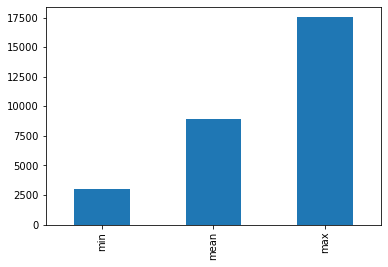

In [487]:
df.salary.describe()[['min', 'mean', 'max']].plot.bar()

#### 按“male”和“female”进行分组，并计算每组的age、salary和tax的平均值。初步看出male组的平均salary大于female组的平均salary。

In [488]:
df2.groupby("gender").mean()

,age,salary,tax
gender,,,
female,39.456242,7904.199676,434.510327
male,39.511128,9924.888120,764.876561


#### 以条形图的方法，对比male和female各个degree组别下的平均工资情况。学历按低到高从左到右进行排列。

1、首先制作学历排序因子。

In [489]:
ORDERED_DEGREE = {}
for i in range(len(DEGREES)):
	ORDERED_DEGREE[DEGREES[i]] = i
ORDERED_DEGREE

{'None': 0, 'BA': 1, 'MBA': 2, 'MA': 3, 'PhD': 4}

2、筛选出male数据行，并按degree分组，计算出各个degree分组下的age、salary和tax的平均值，形成新的数据集。

In [490]:
maleDf2 = df2[(df2.gender == 'male')]
maleSalary = maleDf2.groupby('degree').mean().sort_values(by=['degree'], key=lambda x: x.map(ORDERED_DEGREE))
maleSalary.head()

,age,salary,tax
degree,,,
None,39.430092,7890.032647,406.103260
BA,39.595361,8930.683556,568.494067
MBA,39.424842,9914.473047,742.447150
MA,39.563394,10920.454949,941.996659
PhD,39.540328,11917.587288,1155.713155


3、筛选出female数据行，并按degree分组，计算出各个degree分组下的age、salary和tax的平均值，形成新的数据集。

In [491]:
femaleDf2 = df2[(df2.gender == 'female')]
femaleSalary = femaleDf2.groupby('degree').mean().sort_values(by=['degree'], key=lambda x: x.map(ORDERED_DEGREE))
femaleSalary.head()

,age,salary,tax
degree,,,
None,39.414109,5893.868473,175.123113
BA,39.614021,6921.673870,279.360328
MBA,39.111524,7860.105295,402.765550
MA,39.583553,8932.154213,570.529574
PhD,39.556677,9917.624728,744.835999


4、将以上两新数据集的平均salary列并排组成新的DataFrame对象。

In [492]:
salary_comparison_by_gender_df = pd.DataFrame({"maleMeanSalary": maleSalary['salary'], "femaleMeanSalary": femaleSalary['salary']})
salary_comparison_by_gender_df.head()

,maleMeanSalary,femaleMeanSalary
degree,,
None,7890.032647,5893.868473
BA,8930.683556,6921.673870
MBA,9914.473047,7860.105295
MA,10920.454949,8932.154213
PhD,11917.587288,9917.624728


5、生成maleMeanSalary和femaleMeanSalary按学历对比的条形图。可以发现在各种学历条件下，male的平均工资都高于female，反映了此前的salary数据列的生成逻辑，即大致上male的工资比female的工资多2000。

<AxesSubplot:xlabel='degree'>

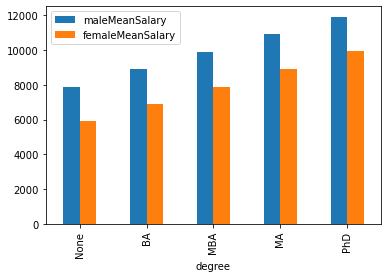

In [493]:
salary_comparison_by_gender_df.plot.bar()

#### 以饼图的方式对比不同degree的人数。可以看出各个各个degree的人数分布比较均匀，反映了此前的degree数据列的生成逻辑是随机的。

In [494]:
df2.degree.value_counts()

PhD     20289
BA      20088
MBA     19952
None    19899
MA      19772
Name: degree, dtype: int64

<AxesSubplot:ylabel='degree'>

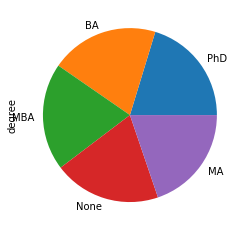

In [495]:
df2.degree.value_counts().plot.pie()

#### 按gender分组来查看salary的直方图。

array([<AxesSubplot:title={'center':'female'}>,
       <AxesSubplot:title={'center':'male'}>], dtype=object)

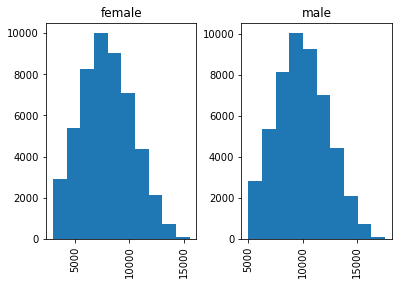

In [496]:
df2.hist(column="salary", by="gender")

#### 以散点图的方式查看age与salary的关系，反映了以前数据生成逻辑中salary随着age增加而增加的关系。

<AxesSubplot:xlabel='age', ylabel='salary'>

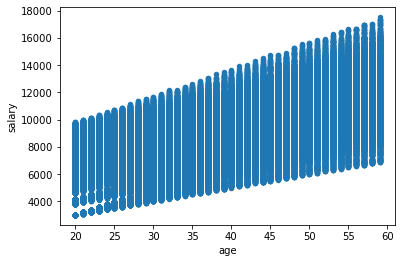

In [497]:
df2.plot.scatter(x = 'age', y = 'salary')

#### 以散点图的方式查看age与degree的关系，反映了以前数据生成逻辑中salary随着degree增加而增加的关系。

<AxesSubplot:xlabel='degree', ylabel='salary'>

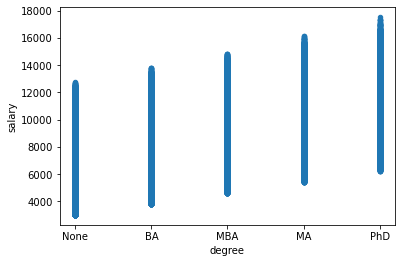

In [498]:
df2.sort_values(by=['degree'], key=lambda x: x.map(ORDERED_DEGREE)).plot.scatter(x = 'degree', y = 'salary')

#### 按gender进行分组后，查看各数值型数据的相关性。发现其中age与salary，age与tax有线性相关关系，符合此前数据生成的逻辑。

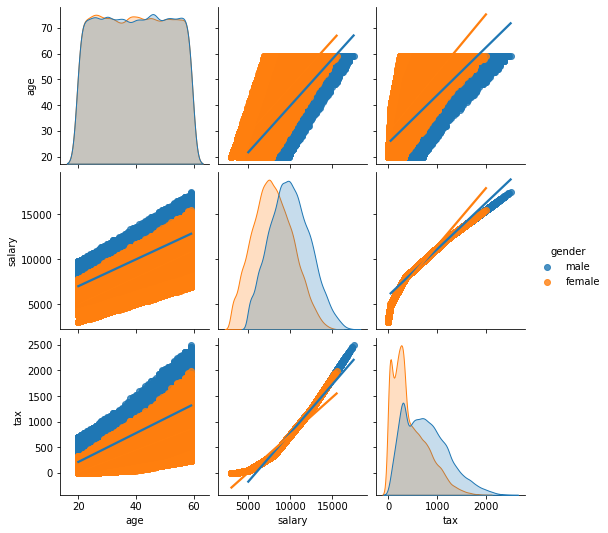

In [499]:
import seaborn as sns
sns.pairplot(df2,kind="reg",diag_kind="kde",hue = 'gender')

#### 以热力图的方式查看各数值型数据的相关性，同样发现其中age与salary，age与tax很强的相关关系，符合此前数据生成的逻辑。

<AxesSubplot:>

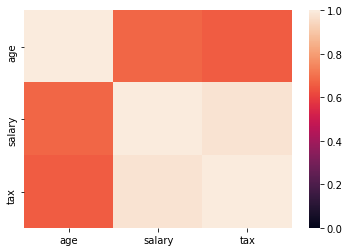

In [500]:
sns.heatmap(df2.corr(), vmin = 0)

### 任务3：简单机器学习及对比

#### 以条形图的方式比较四个回归模型的预测精确度。

1、经验证，在数据集在100000条的情况下，无法在短时间内算出各个线性回归模型下的r2_score值，故须将数据集的规模适当进行缩小。

In [501]:
df2 = df2.iloc[0:int(SIZE / 10), :]
df2.describe()

,age,salary,tax
count,10000.000000,10000.000000,10000.000000
mean,39.244100,8918.335600,600.652020
std,11.582164,2564.831696,439.308607
min,20.000000,3000.000000,0.000000
25%,29.000000,7100.000000,255.000000
50%,39.000000,8853.000000,515.600000
75%,49.000000,10679.250000,880.850000
max,59.000000,17518.000000,2499.500000


2、将degree列用整数进行编码以生成新一列degree_cat。

In [502]:
# LabelEncoder是对categorical的变量，例如gender、degree进行编码，变成整数，这样才能进行回归，否则数据格式不对。
from sklearn.preprocessing import LabelEncoder

# 首先对学位degree这个categorical的变量用LabelEncoder进行编码，得到degree_cat列，是整数类型，用这个进行回归。
# 这句执行后表格会在最后面多一列叫degree_cat。
df2["degree_cat"] = LabelEncoder().fit_transform(df2.degree.values)

df2.head()

<ipython-input-502-fb92f1339659>:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,age,gender,degree,salary,tax,degree_cat
0,32,male,MBA,8866,518.20,2
1,47,female,MA,10188,782.60,1
2,57,male,MBA,13341,1455.25,2
3,38,female,None,5862,131.20,3
4,33,male,BA,7297,274.70,0


3、计算4种回归模型下的r2_score值。

In [503]:
# train_test_split函数是将一批数据自动分成训练集和测试集。
# 类似于把题库分成学习的题目和考试的题目，学生就是模型，学习的题目让学生学习，考试的题目测试学生的学习效果，也就是模型的效果。
from sklearn.model_selection import train_test_split
# 用之前引入的train_test_split函数把数据分成训练集（学习用的题目）和测试集（考试题）。
# train_test_split()一共传入了两个参数，第一个参数是自变量集合，第二个参数是因变量。
# 本例中是让模型去学习（年龄，学历）和工资的关系。
# 分割后X_train就是用于训练的年龄和学历，y_train就是用于训练的对应的工资。
# 同理X_test, y_test就是用于测试的。
# 这里X大写因为X是向量，也就是有两个变量：age和degree，y是标量，只有salary一个变量。
X_train, X_test, y_train, y_test = train_test_split(df2[["age", "degree_cat"]],df2.salary)

# 我们看下我们所有样本被分成了3:1共4份，3份用于学习，1份用于测试，相互不重合。
print(X_train.shape, X_test.shape)

# 我们引入R2指标，R2指标大概意思是你的模型对结果解释的百分比。
# R2 = 0.9表示模型能预测出结果的90%部分。
from sklearn.metrics import r2_score

# 线性回归模型LindearRegression
from sklearn.linear_model import LinearRegression
# 支持向量机回归模型
from sklearn.svm import SVR
# 贝叶斯岭回归模型和ElasticNet模型
from sklearn.linear_model import BayesianRidge, ElasticNet

lr = LinearRegression()
lr.fit(X_train, y_train)
r2_score_lr = r2_score(y_test, lr.predict(X_test))
print('r2_score_lr', r2_score_lr)

svr = SVR()
svr.fit(X_train, y_train)
r2_score_svr = r2_score(y_test, svr.predict(X_test))
print('r2_score_svr', r2_score_svr)

# 贝叶斯岭回归的效果也不错
br = BayesianRidge()
br.fit(X_train, y_train)
r2_score_br = r2_score(y_test, br.predict(X_test))
print('r2_score_br', r2_score_br)

# ElasticNet的效果也不错
en = ElasticNet()
en.fit(X_train, y_train)
r2_score_en = r2_score(y_test, en.predict(X_test))
print('r2_score_en', r2_score_en)

(7500, 2) (2500, 2)
r2_score_lr 0.48523420812582796
r2_score_svr 0.2508010281128372
r2_score_br 0.4851949849774321
r2_score_en 0.48233292125186367


4、把各个r2_score值放进一个数组中，并用高级可视化工具plotly进行数据呈现。（注意：Jupyter Notebook在将此.ipynb文件导出为HTML文件时，会丢失该plotly生成的条形图。）

In [504]:
import plotly.graph_objects as go

r2_scores = [r2_score_lr, r2_score_svr, r2_score_br, r2_score_en]
fig = go.Figure(data=go.Bar(x=['lr', 'svr', 'br', 'en'], y=r2_scores))
fig.show()

## 作业及课程收获小结

1、做数据分析编程需要极大的细心和耐心，而细心和耐心需要充足的精力来保障。

2、模仿是编程学习的主要方式，要多上机进行实际操作才能对相关知识点有更直观和感性的认识。

3、要时时按高质量的编码规范来进行代码创作，对代码、注释和文档等进行持续的优化，追求更高的可读性。